In [1]:
# importng all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing data set
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
list(df.columns)

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [6]:
for data in df.columns:
    print(data)

gender
race/ethnicity
parental level of education
lunch
test preparation course
math score
reading score
writing score


In [7]:
for col in df.columns:
    print(f"{col}: \n{df[col].unique()}\n")

gender: 
['female' 'male']

race/ethnicity: 
['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education: 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch: 
['standard' 'free/reduced']

test preparation course: 
['none' 'completed']

math score: 
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]

reading score: 
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]

writing score: 
[ 74  

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
#Getting Target column and other variables
X = df.drop(columns=['math score'],axis=1)

In [10]:
#checking first 5 rows
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [11]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

Text(0.5, 1.0, 'Graphical Nature')

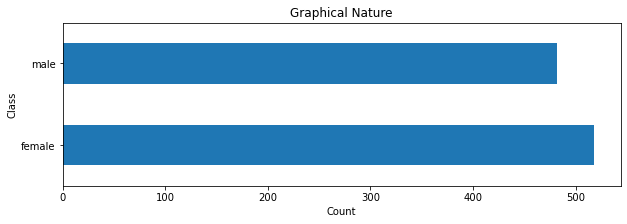

In [12]:
plt.figure(figsize=(10,3))
df["gender"].value_counts().plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Class")
plt.title("Graphical Nature")
#plt.show()

In [13]:
Y = df['math score']
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [14]:
X.shape

(1000, 7)

In [15]:
Y.shape

(1000,)

In [16]:
#Checking for categories in dataset
print(f"Categories in gender : {df['gender'].unique()}")
print(f"Categories in race/ethnicity : {df['race/ethnicity'].unique()}")
print(f"Categories in parental level of education : {df['parental level of education'].unique()}")
print(f"Categories in lunch : {df['lunch'].unique()}")
print(f"Categories in test preparation course : {df['test preparation course'].unique()}")

Categories in gender : ['female' 'male']
Categories in race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch : ['standard' 'free/reduced']
Categories in test preparation course : ['none' 'completed']


In [17]:
#Seperating Numerical and categorical features, column transformation
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns
num_transformer= StandardScaler()
oh_transformer = OneHotEncoder()
preprocessor =ColumnTransformer([("OneHotEncoder",oh_transformer,cat_features),("StandardScaler",num_transformer,num_features)])


In [18]:
X=preprocessor.fit_transform(X)

In [19]:
X.shape

(1000, 19)

# Train and Test Dataset

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [21]:
X_train.shape

(800, 19)

In [22]:
X_test.shape

(200, 19)

# A function to give all metrics after model training

In [23]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rsme = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,mse,rsme,r2_square

In [24]:
models = {
 "Linear Regression": LinearRegression(),
 "Lasso": Lasso(),
 "Ridge": Ridge(),
 "K-Neighbors Regressor": KNeighborsRegressor(),
 "Decision Tree": DecisionTreeRegressor(),
 "Random Forest": RandomForestRegressor(),
 "XGBRegressor": XGBRegressor(),
 "CatBoost Regressor": CatBoostRegressor(verbose=False),
 "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    
    # model training
    model.fit(X_train, Y_train)
   
    # model prediction
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # evaluate train and test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for training set:")
    print(f"- Root mean squared error: {model_train_rmse}")
    print(f"- Mean absolute error: {model_train_mae}")
    print(f"- R2 score: {model_train_r2}")
    print("- " * 30)
    print("Model performance for test set:")
    print(f"- Root mean squared error: {model_test_rmse}")
    print(f"- Mean absolute error: {model_test_mae}")
    print(f"- R2 score: {model_test_r2}")
    
    r2_list.append(model_test_r2)
    print("="*35)
    print('\n')


Linear Regression
Model performance for training set:
- Root mean squared error: 5.323050852720513
- Mean absolute error: 4.266711846071957
- R2 score: 0.8743172040139593
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Model performance for test set:
- Root mean squared error: 5.393993869732845
- Mean absolute error: 4.214763142474852
- R2 score: 0.8804332983749564


Lasso
Model performance for training set:
- Root mean squared error: 6.593815587795566
- Mean absolute error: 5.206302661246526
- R2 score: 0.8071462015863456
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Model performance for test set:
- Root mean squared error: 6.519694535667421
- Mean absolute error: 5.157881810347763
- R2 score: 0.8253197323627852


Ridge
Model performance for training set:
- Root mean squared error: 5.323324922741654
- Mean absolute error: 4.26498782372598
- R2 score: 0.8743042615212909
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Model performance for test 

In [25]:
df1 = pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name", "R2 Score"]).sort_values("R2 Score")
print(df1)

              Model Name  R2 Score
4          Decision Tree  0.723862
3  K-Neighbors Regressor  0.784030
6           XGBRegressor  0.821589
1                  Lasso  0.825320
8     AdaBoost Regressor  0.841489
5          Random Forest  0.851016
7     CatBoost Regressor  0.851632
0      Linear Regression  0.880433
2                  Ridge  0.880593


In [26]:
df1 = df1.reset_index(drop=True)

In [27]:
df1

,Model Name,R2 Score
0,Decision Tree,0.723862
1,K-Neighbors Regressor,0.784030
2,XGBRegressor,0.821589
3,Lasso,0.825320
4,AdaBoost Regressor,0.841489
5,Random Forest,0.851016
6,CatBoost Regressor,0.851632
7,Linear Regression,0.880433
8,Ridge,0.880593


In [28]:
df1 = df1.sort_values(by="Model Name").reset_index(drop=True)

In [29]:
df1

,Model Name,R2 Score
0,AdaBoost Regressor,0.841489
1,CatBoost Regressor,0.851632
2,Decision Tree,0.723862
3,K-Neighbors Regressor,0.784030
4,Lasso,0.825320
5,Linear Regression,0.880433
6,Random Forest,0.851016
7,Ridge,0.880593
8,XGBRegressor,0.821589


# Ridge

In [30]:
ridge_model = Ridge(fit_intercept=True)
ridge_model = ridge_model.fit(X_train,Y_train)
Y_pred = ridge_model.predict(X_test)
score = r2_score(Y_test,Y_pred)*100
print(f" Accuracy of the model is: {score}")

 Accuracy of the model is: 88.0593148502874


# Plot Y_pred and Y_test

Text(0, 0.5, 'Predicted')

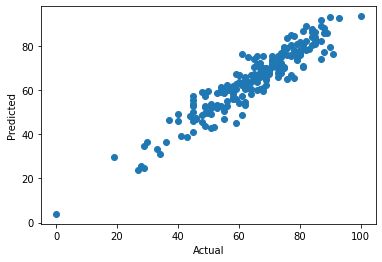

In [31]:
plt.scatter(Y_test,Y_pred);
plt.xlabel("Actual")
plt.ylabel("Predicted")

<AxesSubplot:xlabel='math score'>

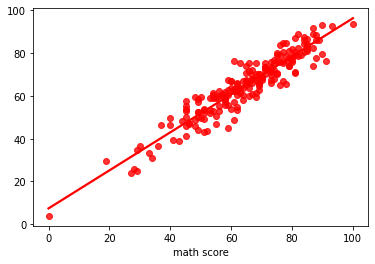

In [32]:
sns.regplot(x=Y_test,y=Y_pred,ci=None,color='red')

# Difference between actual and predicted value

In [33]:
pred_dif = pd.DataFrame({'Actual_value': Y_test, 'Predicted_value': Y_pred, 'Difference': Y_test - Y_pred})

In [34]:
pred_dif

,Actual_value,Predicted_value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504
